In [ ]:
!pip install --upgrade pip
#!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install pillow
!pip install scikit-learn

!pip uninstall -y tensorflow
!pip install --upgrade pip
!pip install tensorflow-macos tensorflow-metal

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## This is my First DeepLearning Project

In [1]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import itertools

#Import image read library
from PIL import Image

#Import ML library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score , confusion_matrix

In [3]:
import pathlib
data_dir = 'bloodcells_dataset'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed = 123,
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset='validation',
    seed = 123,
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.
Found 17092 files belonging to 8 classes.
Using 5127 files for validation.


In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

print(model)


/opt/anaconda3/envs/tfhf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>


In [7]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
428/428 ━━━━━━━━━━━━━━━━━━━━ 3208s 7s/step - accuracy: 0.6008 - loss: 1.0580 - val_accuracy: 0.7174 - val_loss: 0.6900
Epoch 2/5
428/428 ━━━━━━━━━━━━━━━━━━━━ 190s 444ms/step - accuracy: 0.8358 - loss: 0.4430 - val_accuracy: 0.8605 - val_loss: 0.3923
Epoch 3/5
428/428 ━━━━━━━━━━━━━━━━━━━━ 190s 445ms/step - accuracy: 0.9023 - loss: 0.2751 - val_accuracy: 0.8974 - val_loss: 0.2841
Epoch 4/5
428/428 ━━━━━━━━━━━━━━━━━━━━ 191s 445ms/step - accuracy: 0.9294 - loss: 0.2022 - val_accuracy: 0.9216 - val_loss: 0.2474
Epoch 5/5
428/428 ━━━━━━━━━━━━━━━━━━━━ 190s 444ms/step - accuracy: 0.9465 - loss: 0.1466 - val_accuracy: 0.9290 - val_loss: 0.2315


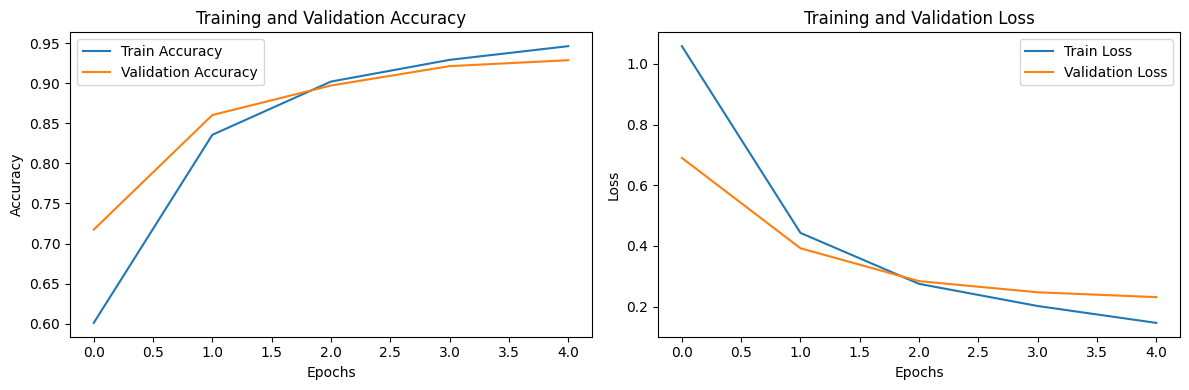

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Any Suggestion